In [28]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 6)

In [17]:
files = !dir /B C:\Users\Jobin\Ds\Datasets\EPL_logo\epl-logos-big\epl-logos-big\arsenal

# Image size distribution

In [31]:
file_path = 'C:\\Users\\Jobin\\Ds\\Datasets\\EPL_logo\\epl-logos-big\\epl-logos-big\\arsenal\\'
shapes = np.asarray([imageio.imread(file_path + f).shape for f in files])

Text(0.5, 0, 'height')

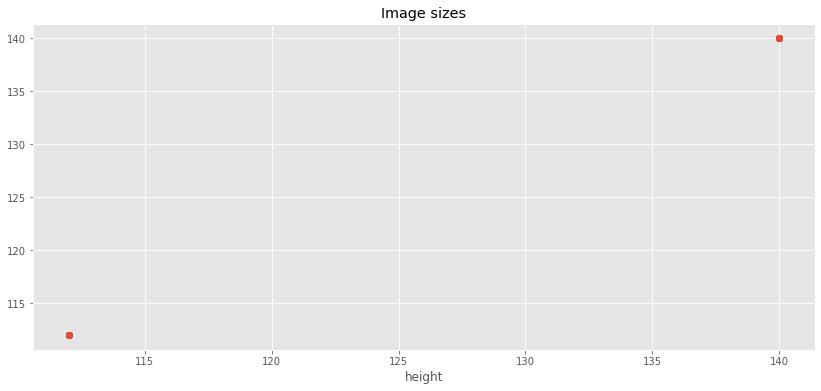

In [35]:
plt.plot(shapes[:, 0], shapes[:, 1], 'o')
plt.title('Image sizes')
plt.xlabel('width')
plt.xlabel('height')
# The images are of two sizes 112 and 140 pixels
# Now lets see the frequency of each

Text(0.5, 1.0, 'Width distribution')

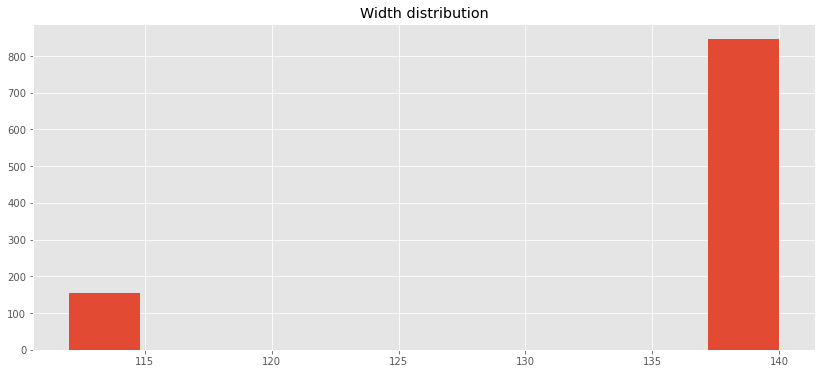

In [37]:
plt.hist(shapes[:, 0], bins=10)
plt.title('Width distribution')
# The 140 pixel images are higher comparatively

In [36]:
np.array(np.unique(shapes[:, 0], return_counts=True)).T

array([[112, 154],
       [140, 846]], dtype=int64)

3


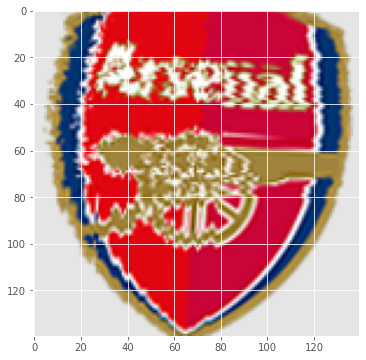

In [47]:
img = mpimg.imread(file_path+files[0])
plt.imshow(img)
print(len(img.shape))

In [45]:
# this image has 4 channels
shapes[0][-1]

4

In [46]:
# each image has 4 channels
np.array(np.unique(shapes[:, 2], return_counts=True)).T

array([[   4, 1000]], dtype=int64)